In [1]:
from   joblib import load
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from   sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from   source.model_evaluation import adjusted_prediction, eval_fpr_tpr, eval_sensitivity_specificity

## Settings

In [2]:
# Set feature files (contains patient info and pyradiomics features)
feature_file_test_set = 'extracted_radiomics_features/extracted_example_features_test.csv' # RVC dataset
label_file_test_set   = 'data/example_labels_test.csv'

# Meta info header columns
n_header_cols = 22

# Number of thresholds
n_thresholds = 401

# Fix seed
seed = 42
np.random.seed(seed)
random.seed(seed)

## Data

In [3]:
# Load pyradiomics features and labels
df_features_test = pd.read_csv(feature_file_test_set)
labels_test      = np.loadtxt(label_file_test_set)

In [4]:
# Inspect features
df_features_test

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,2.2.0,1.17.4,1.2.4,1.1.1,3.7.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},8a49d3976d5436864add81dfe9d9c5047d68f7b1,3D,"(1.0, 1.0, 1.0)",...,8381.474453,0.010441,7.377744,0.943759,0.079298,0.020081,0.004419,459087.669541,7.063976,47.493047
1,2.2.0,1.17.4,1.2.4,1.1.1,3.7.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},2a5c371657c92192fa3656168089b891fb3fd882,3D,"(1.0, 1.0, 1.0)",...,8477.905147,0.006184,7.429139,0.932785,0.078631,0.018286,0.004832,435471.212179,6.469555,48.845150
2,2.2.0,1.17.4,1.2.4,1.1.1,3.7.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},abffbc17c5d84c92d25da9b5a263628970fd166f,3D,"(1.0, 1.0, 1.0)",...,8670.783398,0.008269,7.382791,0.942387,0.071954,0.019934,0.004403,464855.198896,7.772603,47.590080
3,2.2.0,1.17.4,1.2.4,1.1.1,3.7.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},ec5764eceeaf807728e2aed2a8f17bf08ecdf567,3D,"(1.0, 1.0, 1.0)",...,8841.655296,0.008569,7.391862,0.938272,0.070233,0.018763,0.004715,421181.945976,6.196358,47.845162
4,2.2.0,1.17.4,1.2.4,1.1.1,3.7.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},ed8b10fd1243ea5f5403b1d13bc0d188a85b97e2,3D,"(1.0, 1.0, 1.0)",...,8460.838122,0.012338,7.340690,0.941015,0.076246,0.018980,0.004689,429250.300160,6.516609,48.729283
5,2.2.0,1.17.4,1.2.4,1.1.1,3.7.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},0c008a714a345ee8a7fcc10905b9f999f9c45022,3D,"(1.0, 1.0, 1.0)",...,8574.814978,0.008779,7.439693,0.934156,0.071390,0.020025,0.004396,460767.225386,7.032029,47.332955
6,2.2.0,1.17.4,1.2.4,1.1.1,3.7.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},f9ddba2bac68272177c6cd38ca199a2a477c92fd,3D,"(1.0, 1.0, 1.0)",...,8493.808987,0.012570,7.405361,0.932785,0.075690,0.018936,0.004570,446699.991542,6.734975,49.380883
7,2.2.0,1.17.4,1.2.4,1.1.1,3.7.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},899c6b47ea21d836b3128cad850bc040943844f8,3D,"(1.0, 1.0, 1.0)",...,8446.077251,0.010046,7.404173,0.939643,0.071786,0.019736,0.004523,452542.624898,6.948387,48.912817
8,2.2.0,1.17.4,1.2.4,1.1.1,3.7.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},f74bf978b08c83e303de759d6cbf990a59d45cde,3D,"(1.0, 1.0, 1.0)",...,9123.872076,0.007636,7.400933,0.938272,0.070233,0.018919,0.004474,439362.289151,7.130236,47.462762
9,2.2.0,1.17.4,1.2.4,1.1.1,3.7.5,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},f5f804175e0c22252d74b008a3467c5134f28628,3D,"(1.0, 1.0, 1.0)",...,8734.658454,0.005235,7.352485,0.946502,0.062023,0.019566,0.004731,431860.606096,6.507239,47.735602


In [5]:
# Drop meta info header columns
df_features_test.drop(columns = df_features_test.columns[:n_header_cols], inplace=True)
df_features_test

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1.0,1.0,10.327956,10.327956,12.041595,12.041595,12.041595,14.456832,716.166667,10.327956,...,8381.474453,0.010441,7.377744,0.943759,0.079298,0.020081,0.004419,459087.669541,7.063976,47.493047
1,1.0,1.0,10.327956,10.327956,12.041595,12.041595,12.041595,14.456832,716.166667,10.327956,...,8477.905147,0.006184,7.429139,0.932785,0.078631,0.018286,0.004832,435471.212179,6.469555,48.845150
2,1.0,1.0,10.327956,10.327956,12.041595,12.041595,12.041595,14.456832,716.166667,10.327956,...,8670.783398,0.008269,7.382791,0.942387,0.071954,0.019934,0.004403,464855.198896,7.772603,47.590080
3,1.0,1.0,10.327956,10.327956,12.041595,12.041595,12.041595,14.456832,716.166667,10.327956,...,8841.655296,0.008569,7.391862,0.938272,0.070233,0.018763,0.004715,421181.945976,6.196358,47.845162
4,1.0,1.0,10.327956,10.327956,12.041595,12.041595,12.041595,14.456832,716.166667,10.327956,...,8460.838122,0.012338,7.340690,0.941015,0.076246,0.018980,0.004689,429250.300160,6.516609,48.729283
5,1.0,1.0,10.327956,10.327956,12.041595,12.041595,12.041595,14.456832,716.166667,10.327956,...,8574.814978,0.008779,7.439693,0.934156,0.071390,0.020025,0.004396,460767.225386,7.032029,47.332955
6,1.0,1.0,10.327956,10.327956,12.041595,12.041595,12.041595,14.456832,716.166667,10.327956,...,8493.808987,0.012570,7.405361,0.932785,0.075690,0.018936,0.004570,446699.991542,6.734975,49.380883
7,1.0,1.0,10.327956,10.327956,12.041595,12.041595,12.041595,14.456832,716.166667,10.327956,...,8446.077251,0.010046,7.404173,0.939643,0.071786,0.019736,0.004523,452542.624898,6.948387,48.912817
8,1.0,1.0,10.327956,10.327956,12.041595,12.041595,12.041595,14.456832,716.166667,10.327956,...,9123.872076,0.007636,7.400933,0.938272,0.070233,0.018919,0.004474,439362.289151,7.130236,47.462762
9,1.0,1.0,10.327956,10.327956,12.041595,12.041595,12.041595,14.456832,716.166667,10.327956,...,8734.658454,0.005235,7.352485,0.946502,0.062023,0.019566,0.004731,431860.606096,6.507239,47.735602


In [6]:
# Inspect labels
labels_test

array([1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1.])

## Feature selection

Exclude the same features from the test set which were found to be highly correlated in the training set.

In [7]:
# Get the names of features which have been dropped before training
dropped_features = np.genfromtxt('feature_selection/dropped_features.csv', delimiter=',', dtype=str)

# Drop features from the test set
df_features_test_uncorr = df_features_test.drop(columns=dropped_features[:-1])

## Load random forest

Load the previously trained random forest model.

In [8]:
# Load previously trained random forest model
rf = load('trained_models/trained_random_forest_model.joblib')

## External random forest validation

We use a dedicated test dataset to get a point estimate of the performance that can be expected from the model for further unseen data. In addition, we evaluate the test data predictions for a wide range of classification thresholds in order to pick and report three different models (A, B and C) later on (see below).

In [9]:
# Prepare test dataset
X_test  = df_features_test_uncorr.to_numpy()
y_test  = labels_test

In [10]:
# Set up a wide range of classification thresholds
thresholds = np.linspace(0.0,1.0,n_thresholds)

In [11]:
bin_acc_test_set     = []
tn_test_set          = []
fp_test_set          = []
fn_test_set          = []
tp_test_set          = []
sensitivity_test_set = []
specificity_test_set = []

# Predict on test set
y_score = rf.predict_proba(X_test)

# Apply different thresholds for classification
for t in thresholds:
    
    # Adjust prediction for the current threshold
    y_pred_adj = adjusted_prediction(y_score, threshold=t, positive_label=1)

    # Prediction scores
    bin_acc_thr = accuracy_score(y_test, y_pred_adj)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adj).ravel()
    sensitivity_thr, specificity_thr = eval_sensitivity_specificity(y_test, y_pred_adj)

    bin_acc_test_set.append(bin_acc_thr)
    tn_test_set.append(tn)
    fp_test_set.append(fp)
    fn_test_set.append(fn)
    tp_test_set.append(tp)
    sensitivity_test_set.append(sensitivity_thr)
    specificity_test_set.append(specificity_thr)
    
# ROC-curve
false_pos_rate_test_set, true_pos_rate_test_set = eval_fpr_tpr(y_test, y_score, positive_label=1)

# ROC-AUC
roc_auc_test_set = roc_auc_score(y_test, y_score[:, 1])

bin_acc_test_set     = np.asarray(bin_acc_test_set)
tn_test_set          = np.asarray(tn_test_set)
fp_test_set          = np.asarray(fp_test_set)
fn_test_set          = np.asarray(fn_test_set)
tp_test_set          = np.asarray(tp_test_set)
sensitivity_test_set = np.asarray(sensitivity_test_set)
specificity_test_set = np.asarray(specificity_test_set)

## Search classification thresholds

Sensitivity, and specificity depend on the classification threshold, a parameter which is used to turn predicted class probabilities, i.e. the output of the random forest model (here: rf.oob_decision_function_) for a given input sample, into class predictions (benign versus premalignant).

Here, we search for three different thresholds:
1. A default threshold value of 0.5 (Model A)
2. A threshold value which maximizes Youden's index (J=sensitivity+specificity1) (Model B)
3. A threshold that results in the highest possible specificity while achieving a sensitivity of at least 0.85 (Model C)

In [12]:
# Find default threshold of 0.5
ind_thr_50 = int(len(thresholds)/2.0)

# Find threshold which maximizes Youden's index J
J         = sensitivity_test_set + specificity_test_set - 1
J_max     = np.amax(J)
ind_J_test_max = np.argmax(J)
print("Maximum Youden's index J = {:0.2f} found for threshold T = {:0.4f}".format(J_max, thresholds[ind_J_test_max]))

# Find threshold which yields sensitivity of 0.85
ind_85_test = 0
while(sensitivity_test_set[ind_85_test] >= 0.85):
    ind_85_test += 1

Maximum Youden's index J = 0.00 found for threshold T = 0.0000


In [13]:
print("External validation validation:\n")
print('roc_auc:     {:.2f}'.format(roc_auc_test_set))

print("\nTest scores for threshold = {:0.3f} (Model A):\n".format(thresholds[ind_thr_50]))  
print('bin_acc:     {:0.2f}'.format(bin_acc_test_set[ind_thr_50]))
print('sensitivity: {:0.2f} ({:d}/{:d})'.format(sensitivity_test_set[ind_thr_50], tp_test_set[ind_thr_50], (tp_test_set[ind_thr_50]+fn_test_set[ind_thr_50])))
print('specifity:   {:0.2f} ({:d}/{:d})'.format(specificity_test_set[ind_thr_50], tn_test_set[ind_thr_50], (tn_test_set[ind_thr_50]+fp_test_set[ind_thr_50])))

print("\nTest scores for threshold = {:0.3f} (Model B):\n".format(thresholds[ind_J_test_max]))  
print('bin_acc:     {:0.2f}'.format(bin_acc_test_set[ind_J_test_max]))
print('sensitivity: {:0.2f} ({:d}/{:d})'.format(sensitivity_test_set[ind_J_test_max], tp_test_set[ind_J_test_max], (tp_test_set[ind_J_test_max]+fn_test_set[ind_J_test_max])))
print('specifity:   {:0.2f} ({:d}/{:d})'.format(specificity_test_set[ind_J_test_max], tn_test_set[ind_J_test_max], (tn_test_set[ind_J_test_max]+fp_test_set[ind_J_test_max])))

print("\nTest scores for threshold = {:0.3f} (Model C):\n".format(thresholds[ind_85_test]))  
print('bin_acc:     {:0.2f}'.format(bin_acc_test_set[ind_85_test]))
print('sensitivity: {:0.2f} ({:d}/{:d})'.format(sensitivity_test_set[ind_85_test], tp_test_set[ind_85_test], (tp_test_set[ind_85_test]+fn_test_set[ind_85_test])))
print('specifity:   {:0.2f} ({:d}/{:d})'.format(specificity_test_set[ind_85_test], tn_test_set[ind_85_test], (tn_test_set[ind_85_test]+fp_test_set[ind_85_test])))

External validation validation:

roc_auc:     0.25

Test scores for threshold = 0.500 (Model A):

bin_acc:     0.68
sensitivity: 0.89 (17/19)
specifity:   0.00 (0/6)

Test scores for threshold = 0.000 (Model B):

bin_acc:     0.76
sensitivity: 1.00 (19/19)
specifity:   0.00 (0/6)

Test scores for threshold = 0.575 (Model C):

bin_acc:     0.64
sensitivity: 0.84 (16/19)
specifity:   0.00 (0/6)


## ROC-Curve

Plot a ROC-curve using the false positive and true positive predictions made by the model.

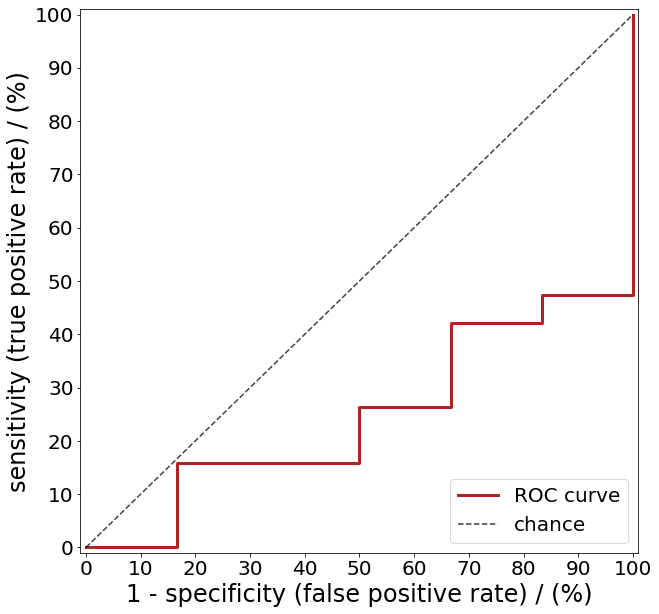

In [14]:
fpr = false_pos_rate_test_set[1]
tpr = true_pos_rate_test_set[1]

plt.figure(0, figsize=(10,10))
   
# Plot ROC-Curve
plt.plot(fpr*100, tpr*100, color='firebrick', lw=3, label='ROC curve', alpha=1.0)
    
# Plot ROC-Curve for chance
plt.plot([0, 100], [0, 100], linestyle='--', lw=1.5, color='k', label='chance', alpha=.75)

plt.xlim([-1, 101])
plt.ylim([-1, 101])
plt.xticks(np.linspace(0,100,11), fontsize=20)
plt.yticks(np.linspace(0,100,11), fontsize=20)
plt.xlabel('1 - specificity (false positive rate) / (%)', fontsize=24)
plt.ylabel('sensitivity (true positive rate) / (%)', fontsize=24)
plt.legend(loc="lower right", fontsize=20)
plt.savefig('plots/roc_curve_test_set.png')
plt.show()